In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_table('charginn.txt',names=['pId', 'status', 'charge', 'mass', 'pt', 'phi', 'eta', 'p', 'beta', 'gamma', 'less10Gev', 'notNearTrack'])

df.head(15)

,pId,status,charge,mass,pt,phi,eta,p,beta,gamma,less10Gev,notNearTrack
0,1000024,62,1,700.048,109.149,2.742540,3.079860,1189.790,0.861881,1.97195,0,0
1,-1000024,62,-1,700.048,134.275,-0.234468,-0.022846,134.310,0.188422,1.01824,0,1
2,1000024,62,1,700.048,279.622,0.529638,-2.061050,1115.910,0.847108,1.88175,0,1
3,-1000024,62,-1,700.048,249.409,-2.786050,-1.943630,888.797,0.785585,1.61615,0,1
4,-1000024,62,-1,700.048,283.369,0.710112,-1.121270,480.965,0.566274,1.21327,0,0
5,1000024,62,1,700.048,306.623,2.455400,1.494320,717.605,0.715809,1.43206,0,0
6,-1000024,62,-1,700.048,116.069,-2.465940,2.642970,819.801,0.760465,1.53993,0,1
7,1000024,62,1,700.048,526.916,1.445640,-0.111461,530.192,0.603751,1.25443,0,1
8,-1000024,62,-1,700.048,190.837,-1.795810,-0.163677,193.399,0.266290,1.03746,0,1
9,1000024,62,1,700.048,109.653,-0.260483,2.230800,516.178,0.593463,1.24245,0,1


In [2]:
less10GeV = df[df['less10Gev'] == 1]

less10GeV.head()

,pId,status,charge,mass,pt,phi,eta,p,beta,gamma,less10Gev,notNearTrack


In [21]:
notNear = df[df['notNearTrack'] == 0]
notNear.head()

,pId,status,charge,mass,pt,phi,eta,p,beta,gamma,less10Gev,notNearTrack,cTau,cTau*boost
0,1000024,62,1,700.048,109.149,2.742540,3.079860,1189.790,0.861881,1.97195,0,0,167.75800,98.7050
4,-1000024,62,-1,700.048,283.369,0.710112,-1.121270,480.965,0.566274,1.21327,0,0,3.86992,5.6327
5,1000024,62,1,700.048,306.623,2.455400,1.494320,717.605,0.715809,1.43206,0,0,24.18880,23.5970
17,1000024,62,1,700.048,290.867,-0.200109,0.638349,352.170,0.449403,1.11941,0,0,3.21554,6.3919
23,1000024,62,1,700.048,203.160,-2.654070,2.571330,1336.750,0.885874,2.15551,0,0,11.40460,5.9725


In [4]:
df.shape

(13202, 12)

In [22]:
notNear.shape

(3774, 14)

In [6]:
less10GeV.shape

(0, 12)

In [7]:
ctau = pd.read_table('ctau.txt', names=['cTau', 'cTau*boost'])

ctau.head()

,cTau,cTau*boost
0,167.75800,98.7050
1,19.89770,103.7100
2,313.30900,196.5500
3,366.32400,288.5300
4,3.86992,5.6327


array([[<AxesSubplot:title={'center':'cTau'}>,
        <AxesSubplot:title={'center':'cTau*boost'}>]], dtype=object)

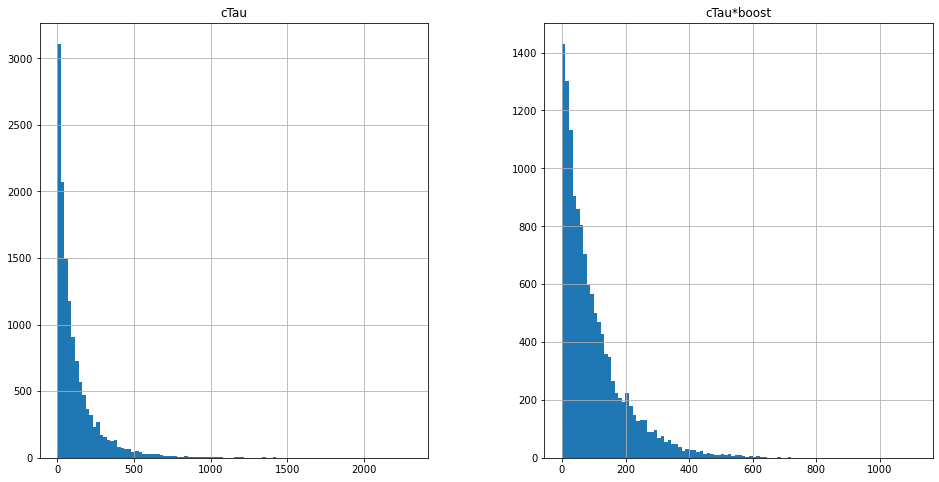

In [8]:
ctau.hist(bins=100,figsize=(16,8))

In [9]:
tracks = pd.read_table('tracksCharginos.txt', names=['charge','pt','phi','eta','validHits'])

validHits = tracks['validHits']
print(validHits)

0        4
1       24
2       25
3        3
4       18
        ..
9423     8
9424    11
9425    20
9426     7
9427     5
Name: validHits, Length: 9428, dtype: int64


In [25]:
df['cTau'] = ctau['cTau']
df['cTau*boost'] = ctau['cTau*boost']

trackedCharginos = df.copy()
trackedCharginos = trackedCharginos[trackedCharginos['notNearTrack']==1]

trackedCharginos.insert(1, "index", range(0,9428))
trackedCharginos.set_index("index", inplace=True)

trackedCharginos.insert(1, "validHits", validHits)
trackedCharginos.sort_values("cTau", inplace=True)

trackedCharginos[trackedCharginos["cTau"] > 0.][["validHits","cTau"]].head(25)

,validHits,cTau
index,,
1174,7,0.061123
6719,6,0.078734
9248,8,0.079116
9273,18,0.092167
1976,6,0.107543
1705,11,0.119237
8517,17,0.134764
8147,16,0.141545
9227,4,0.142122


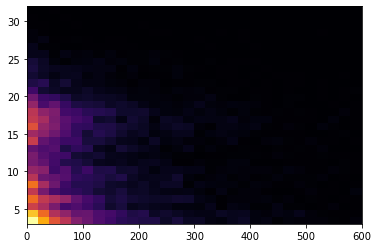

In [11]:
im = plt.hist2d(trackedCharginos['cTau'], validHits, bins=30,range=[[0,600],[3,32]], cmap='inferno')

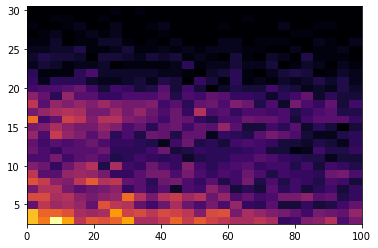

In [12]:
_,_,_,im = plt.hist2d(trackedCharginos['cTau*boost'], validHits, bins=28, range=[[0,100],[2.5,30.5]], cmap='inferno')

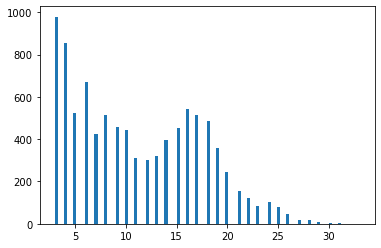

In [13]:
_,_,im = plt.hist(validHits,bins=100)

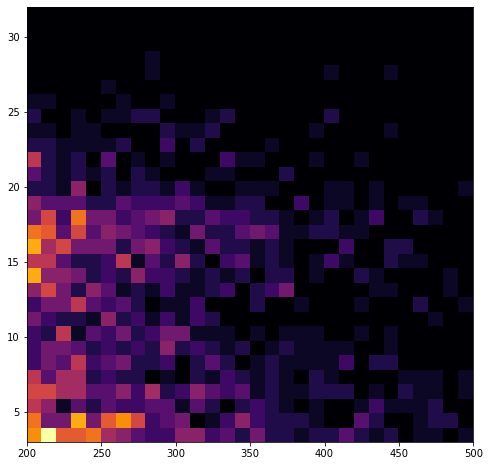

In [14]:
ctau200 = trackedCharginos[trackedCharginos['cTau*boost'] > 200]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

_,_,_,im = ax.hist2d(ctau200['cTau*boost'], ctau200['validHits'], bins=30, range=[[200,500],[3,32]], cmap='inferno')

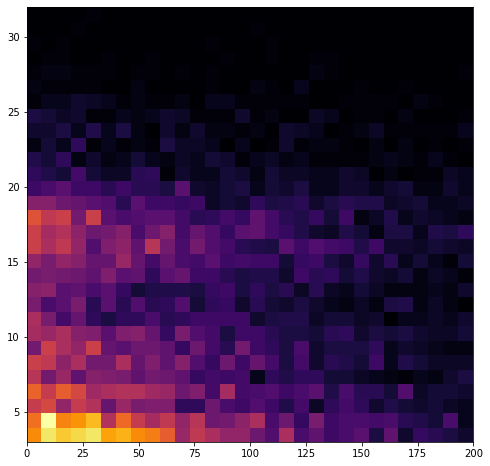

In [15]:
cTauG200 = trackedCharginos[trackedCharginos['cTau*boost'] > 200]
cTauL200 = trackedCharginos[trackedCharginos['cTau*boost'] < 200]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

_,_,_,im = ax.hist2d(cTauL200['cTau*boost'], cTauL200['validHits'], bins=30, range=[[0,200],[3,32]], cmap='inferno')

In [16]:
copyCharginos = trackedCharginos.copy()

copyCharginos.sort_values('cTau*boost', inplace=True)
copyCharginos.tail(20)

,pId,validHits,status,charge,mass,pt,phi,eta,p,beta,gamma,less10Gev,notNearTrack,cTau,cTau*boost
index,,,,,,,,,,,,,,,
8104,1000024,16,62,1,700.048,526.421,0.115368,1.834670,1690.530,0.923917,2.61374,0,1,1182.890,608.63
5711,-1000024,4,62,-1,700.048,299.942,1.007530,-1.125150,510.693,0.589354,1.23782,0,1,1471.280,615.74
5523,1000024,14,62,1,700.048,694.806,2.456430,1.168820,1225.960,0.868395,2.01665,0,1,616.738,617.99
3830,1000024,9,62,1,700.048,388.093,2.773550,-2.270310,1898.870,0.938269,2.89095,0,1,533.206,625.09
2458,1000024,25,62,1,700.048,467.192,-1.558400,1.657510,1270.020,0.875768,2.07154,0,1,403.878,639.27
5229,-1000024,19,62,-1,700.048,151.291,2.834970,-2.181610,678.794,0.696125,1.39291,0,1,672.362,662.15
2900,1000024,6,62,1,700.048,452.644,0.300103,0.980550,688.252,0.701073,1.40235,0,1,228.588,669.49
3858,1000024,19,62,1,700.048,521.633,-0.157309,-1.031860,824.866,0.762436,1.54544,0,1,144.782,678.89
9002,-1000024,5,62,-1,700.048,695.784,-2.789560,-0.356872,740.563,0.726706,1.45571,0,1,481.826,682.34


In [17]:
def createLabel10s(cTau):
    return (10 * np.ceil(cTau / 10))

cTauRange = float(copyCharginos[-1:]['cTau*boost'])
cTauIntervals10 = range(0, int(np.ceil(cTauRange/10)))

trackedCharginos['cTauLabel10s'] = createLabel10s(trackedCharginos['cTau*boost'])
trackedCharginos.head(15) 

,pId,validHits,status,charge,mass,pt,phi,eta,p,beta,gamma,less10Gev,notNearTrack,cTau,cTau*boost,cTauLabel10s
index,,,,,,,,,,,,,,,,
7817,-1000024,3,62,-1,700.048,976.315,-1.566090,0.159472,988.756,0.816150,1.73058,0,1,0.000000,0.00000,0.0
2737,-1000024,7,62,-1,700.048,313.863,-1.541430,0.567642,365.801,0.463122,1.12829,0,1,0.000000,0.00000,0.0
1851,1000024,18,62,1,700.048,1598.980,-2.575910,0.545455,1842.800,0.934820,2.81593,0,1,0.000000,0.00000,0.0
2426,-1000024,9,62,-1,700.048,347.437,1.014150,-1.173710,615.516,0.660310,1.33157,0,1,0.000000,0.00000,0.0
8621,-1000024,20,62,-1,700.048,975.552,-0.548510,0.044781,976.530,0.812738,1.71636,0,1,0.000000,0.00000,0.0
1846,-1000024,17,62,-1,700.048,464.464,-0.158964,-0.825110,631.744,0.669961,1.34699,0,1,0.000000,0.00000,0.0
3193,1000024,15,62,1,700.048,541.449,2.297790,-0.776307,712.963,0.713540,1.42732,0,1,0.000000,0.00000,0.0
7729,-1000024,7,62,-1,700.048,616.082,1.899930,0.880377,870.658,0.779329,1.59588,0,1,0.000000,0.00000,0.0
5888,1000024,10,62,1,700.048,876.222,-1.247320,1.495050,2052.020,0.946441,3.09715,0,1,0.000000,0.00000,0.0


In [18]:
cTauIn10s = trackedCharginos.groupby('cTauLabel10s')['validHits'].mean()

print(cTauIn10s)

cTauLabel10s
0.0       12.333333
10.0      11.359155
20.0      11.104938
30.0      10.701453
40.0      10.836149
            ...    
840.0     20.000000
860.0      8.000000
930.0     24.000000
960.0     10.000000
1120.0     8.000000
Name: validHits, Length: 78, dtype: float64


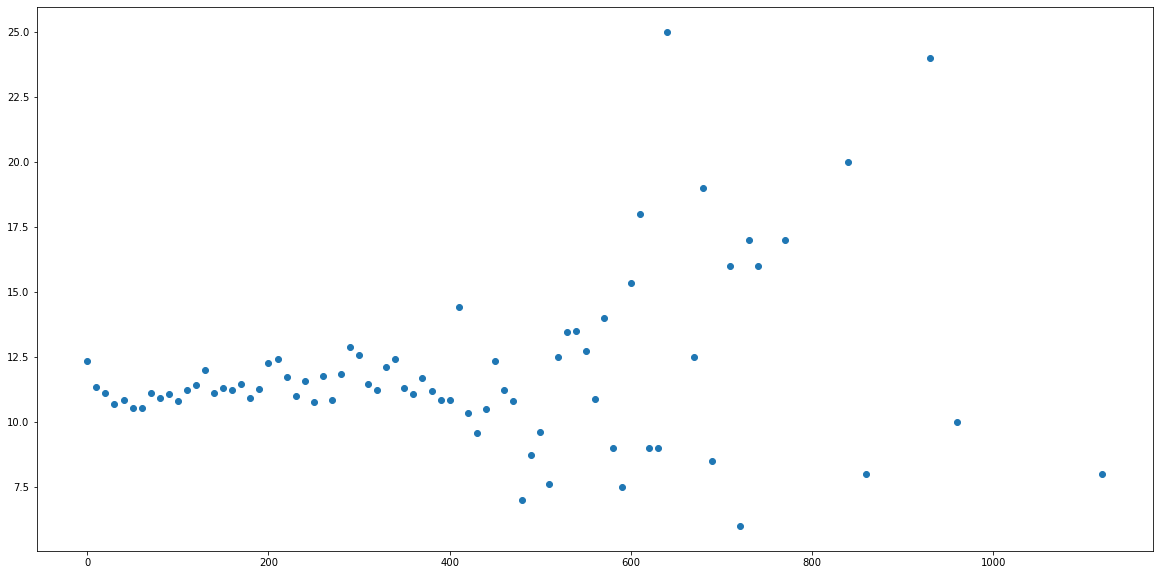

In [19]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

#_,_,_ = ax.hist(cTauIn10s, bins = cTauIn10s.index)
ax.scatter(cTauIn10s.index, cTauIn10s)

In [20]:
trackedCharginos.sort_values('cTau*boost', inplace=True)
trackedCharginos[trackedCharginos['cTau*boost'] < 1].tail(20)

,pId,validHits,status,charge,mass,pt,phi,eta,p,beta,gamma,less10Gev,notNearTrack,cTau,cTau*boost,cTauLabel10s
index,,,,,,,,,,,,,,,,
9092,1000024,13,62,1,700.048,911.445,-1.601480,0.466307,1012.350,0.822499,1.75819,0,1,0.465112,0.80487,10.0
1625,-1000024,20,62,-1,700.048,417.000,2.309660,-0.712301,527.336,0.601678,1.25197,0,1,0.986164,0.80927,10.0
5404,-1000024,22,62,-1,700.048,763.467,2.470050,-2.075950,3091.120,0.975302,4.52741,0,1,0.231734,0.81941,10.0
4760,-1000024,6,62,-1,700.048,466.768,-2.473290,-0.943462,690.383,0.702175,1.40448,0,1,0.385421,0.82132,10.0
7800,1000024,10,62,1,700.048,364.292,-0.086184,0.433476,399.057,0.495231,1.15106,0,1,0.774158,0.83424,10.0
8717,1000024,4,62,1,700.048,448.251,1.308790,-0.363367,478.171,0.564034,1.21102,0,1,0.356311,0.83852,10.0
5661,1000024,12,62,1,700.048,703.245,2.414410,-0.426190,768.086,0.739083,1.48453,0,1,0.698498,0.86015,10.0
6295,1000024,5,62,1,700.048,286.902,-0.434174,-1.688210,802.558,0.753595,1.52129,0,1,0.936754,0.86081,10.0
2317,-1000024,12,62,-1,700.048,258.801,2.282990,0.733567,331.613,0.428098,1.10652,0,1,1.146620,0.86191,10.0
